<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kills          5 non-null      int64  
 1   damageDealt    5 non-null      float64
 2   winPlacePerc   5 non-null      float64
 3   boosts         5 non-null      int64  
 4   heals          5 non-null      int64  
 5   walkDistance   5 non-null      int64  
 6   rideDistance   5 non-null      int64  
 7   swimDistance   5 non-null      int64  
 8   headshotKills  5 non-null      int64  
 9   killStreaks    5 non-null      int64  
dtypes: float64(2), int64(8)
memory usage: 528.0 bytes


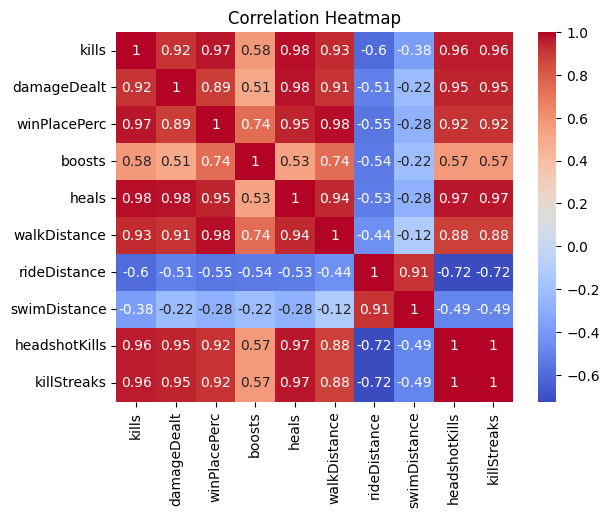

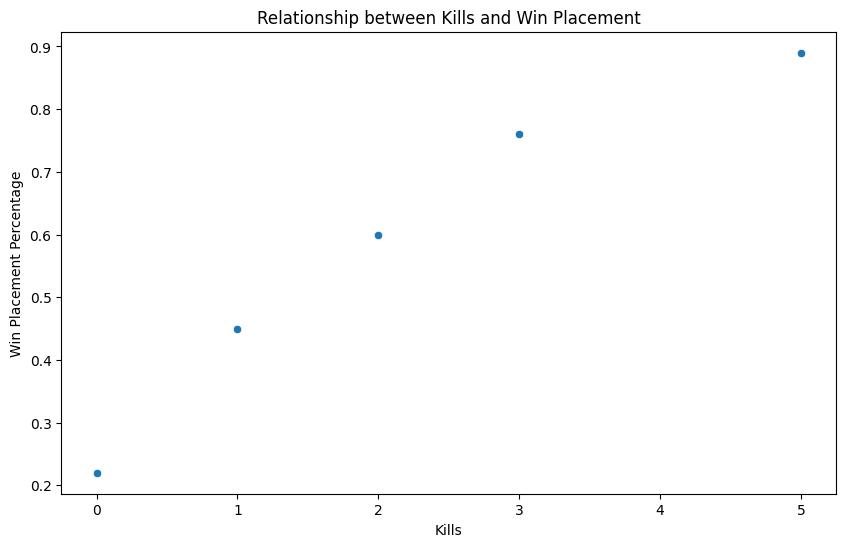

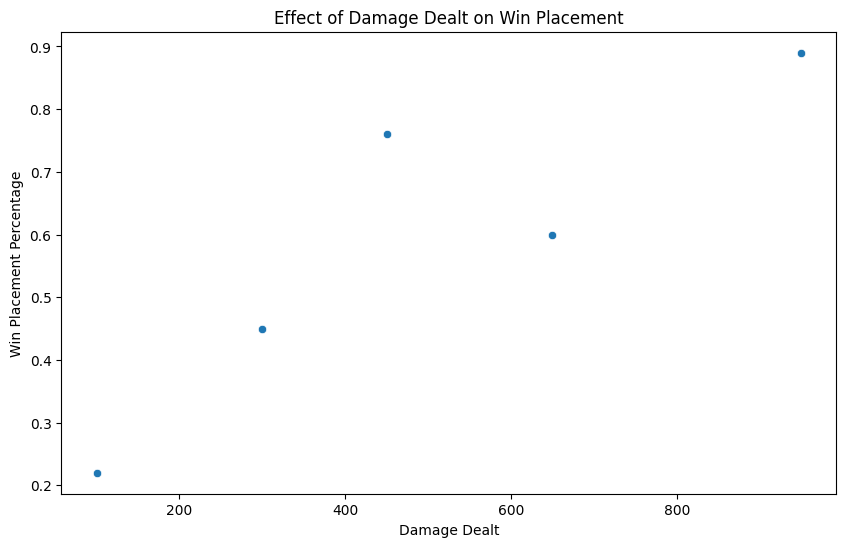

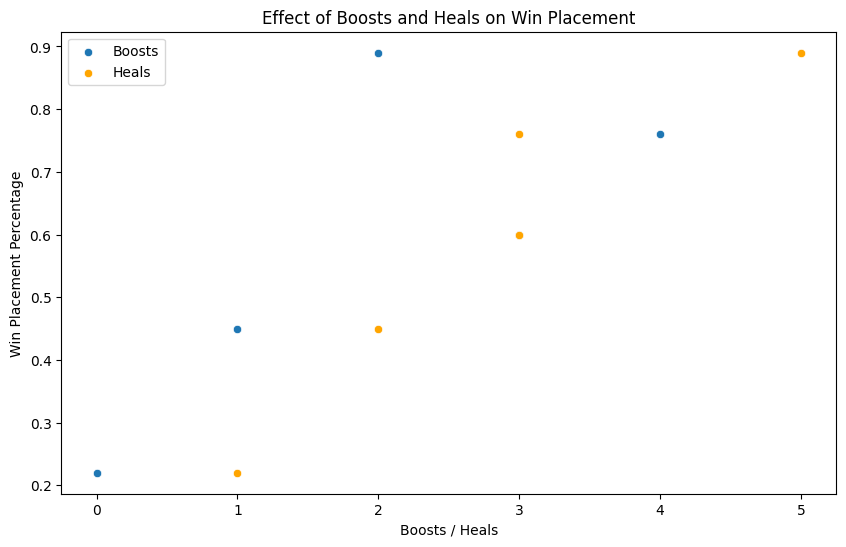

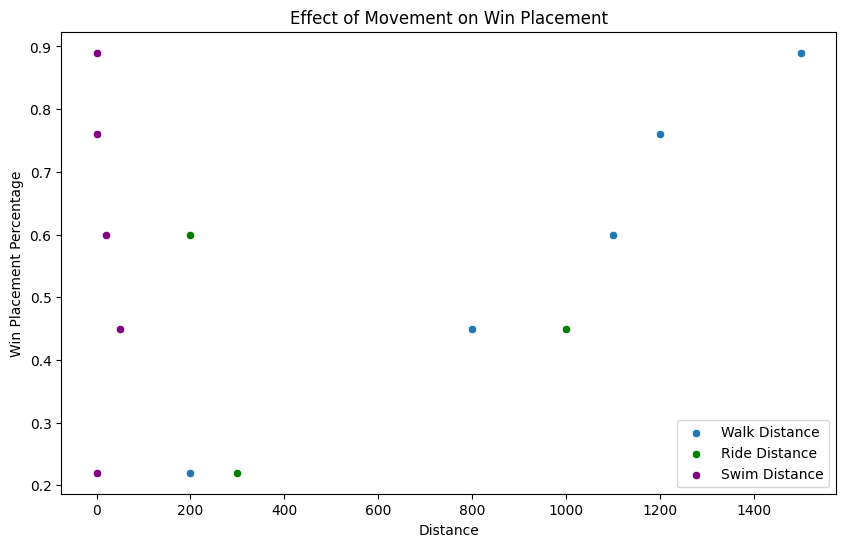

In [ ]:
# import libraries
import pandas as pd #for data manipulation
import numpy as np #for numerical operations
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for statistical graphics

#load dataset
df = {
    'kills': [3, 0, 5, 1, 2],
    'damageDealt': [450.0, 100.0, 950.0, 300.0, 650.0],
    'winPlacePerc': [0.76, 0.22, 0.89, 0.45, 0.60],
    'boosts': [4, 0, 2, 1, 3],
    'heals': [3, 1, 5, 2, 3],
    'walkDistance': [1200, 200, 1500, 800, 1100],
    'rideDistance': [0, 300, 0, 1000, 200],
    'swimDistance': [0, 0, 0, 50, 20],
    'headshotKills': [1, 0, 2, 0, 1],
    'killStreaks': [1, 0, 2, 0, 1]
}
# Convert dictionary to DataFrame
data = pd.DataFrame(df)
#view the first few rows of dataset
data.head()
#get summary of data
data.info()
#for data cleaning (check for missing values)
data.isnull().sum()
# no null values so no need to fill them

# Calculate the correlation Matrix
corr_matrix = data.corr(numeric_only=True)
corr_matrix

# creating a Heatmap based on correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Identify the Strong Positive correlation

# Set a threshold for strong correlations
strong_corr_threshold = 0.7
# Find strong positive correlations
strong_correlations = corr_matrix[(corr_matrix > strong_corr_threshold) & (corr_matrix != 1.0)]
strong_correlations

# Identify the Weaker correlation

# Set thresholds for weak correlations
weak_corr_threshold = 0.3
# Find weak correlations
weak_correlations = corr_matrix[(corr_matrix.abs() < weak_corr_threshold)]
weak_correlations

# data visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kills', y='winPlacePerc', data=data)
plt.title('Relationship between Kills and Win Placement')
plt.xlabel('Kills')
plt.ylabel('Win Placement Percentage')
plt.show()

# data visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='damageDealt', y='winPlacePerc', data=data)
plt.title('Effect of Damage Dealt on Win Placement')
plt.xlabel('Damage Dealt')
plt.ylabel('Win Placement Percentage')
plt.show()

# data visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='boosts', y='winPlacePerc', data=data, label='Boosts')
sns.scatterplot(x='heals', y='winPlacePerc', data=data, label='Heals', color='orange')
plt.title('Effect of Boosts and Heals on Win Placement')
plt.xlabel('Boosts / Heals')
plt.ylabel('Win Placement Percentage')
plt.legend()
plt.show()

# data visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='walkDistance', y='winPlacePerc', data=data, label='Walk Distance')
sns.scatterplot(x='rideDistance', y='winPlacePerc', data=data, label='Ride Distance', color='green')
sns.scatterplot(x='swimDistance', y='winPlacePerc', data=data, label='Swim Distance', color='purple')
plt.title('Effect of Movement on Win Placement')
plt.xlabel('Distance')
plt.ylabel('Win Placement Percentage')
plt.legend()
plt.show()


In [1]:
# PCA (10marks question MSE2)
# step1
#import libraries
import numpy as np #for numerical operations
import pandas as pd #for data manipulation
from sklearn.decomposition import PCA #For performing Principal Component Analysis (PCA)
import matplotlib.pyplot as plt #for visualization

# simulated data for 10 students
data = {
    "Study Hours": [5, 3, 4, 6, 5, 2, 3, 4, 5, 6],
    "Recreation Hours": [2, 4, 3, 1, 2, 5, 4, 3, 2, 1],
    "Attendance (%)": [90, 75, 80, 95, 85, 60, 70, 75, 85, 95],
    "Assignments Submitted": [8, 5, 6, 9, 7, 3, 4, 6, 7, 9],
    "Sleep Hours": [7, 6, 6.5, 8, 7, 5,5.5,6,7,8]
}

# create dataframe
df = pd.DataFrame(data)
df

# step2
from sklearn.preprocessing import StandardScaler #For standardizing features

# standardize the data
scaler = StandardScaler()
# scaler is an object
data_scaled = scaler.fit_transform(df)
print("\nStandardized Data:\n", data_scaled)

# step3
# compute the covariance matrix
cov_matrix = np.cov(data_scaled.T)
print("\nCovariance Mtarix:\n", cov_matrix)

# step4
# compute Eigen values and Eigen vector
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigen values:\n", eigenvalues)
print("\nEigen vectors:\n", eigenvectors)

# step5
# Sort Eigen values and Eigen vector
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# choose top 2 principal components
n_components = 2
principal_components = sorted_eigenvectors[:, :n_components]
print("\nPrincipal Components:\n", principal_components)

# step6
# Project data onto principal components
transformed_data = np.dot(data_scaled, principal_components)
print("\nTransformed Data:\n", transformed_data)

# Create a new DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=["Principal Component 1", "Principal Component 2"])
print("\nPrincipal Components:")
print(pca_df)

# step7
# Explained variance
pca = PCA(n_components=2)  # Create a PCA instance with the same number of principal components
pca.fit(data_scaled)
print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)

# Step 8:
# Plot the principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df["Principal Component 1"], pca_df["Principal Component 2"], c="blue", edgecolor="k", s=100)
plt.title("PCA of Students' Study Patterns", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.grid(True)
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '/content/archive.zip'